<h1 style="color:Purple" align="center">California Housing Prices Algorithm<h1>

## 1.Problem Statement

The goal is to `predict the median house value` of a property in `California` based on various attributes such as geographical location, size, and economic factors.

The dataset includes the following features:
- **Longitude:** The geographic coordinate representing the house's location.
- **Latitude:** The geographic coordinate representing the house's location.
- **Housing Median Age:** The age of the house.
- **Total Rooms:** The total number of rooms in the house.
- **Total Bedrooms:** The total number of bedrooms in the house.
- **Population:** The population of the area where the house is located.
- **Households:** The number of households in the area.
- **Median Income:** The median income of households in the area.
- **Ocean Proximity:** A categorical feature indicating the proximity of the house to the ocean (e.g., "NEAR OCEAN", "INLAND", etc.).

The task is to develop a machine learning model that can accurately predict the median house value based on these features.

---

**Problem Type**:  
- Regression Problem: The target variable, median house value, is continuous, making it a regression problem.

---

**Approach**:

- **Data Preprocessing**:
  - Handle any missing values in the dataset.
  - Convert categorical variables (like ocean_proximity) into numerical values using techniques such as one-hot encoding.
  - Normalize or scale numerical features if necessary.

- **Modeling**:
  - Train a regression model (e.g., Linear Regression, Random Forest Regressor, or Neural Networks) to predict house prices based on the given features.

- **Evaluation**:
  - Evaluate the model’s performance using appropriate metrics such as Mean Absolute Error (MAE), Root Mean Squared Error (RMSE), or R² score.





Regarding our problem, our model is a **`supervised batch  multi variable uni variate regression `** alogorithm and performance measure is **`RMSE`** or **`MAE`**

## 2.Get the data

In [145]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
housing=pd.read_csv("housing.csv")

In [3]:
housing.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


## 3.Exploring  and Visulaization of the data

In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


---
`"total_bedrooms"` has (20640-20433) null values. we need to deal with these later on

---

In [5]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


---
The `25%`, `50%`, and `75%` rows show the corresponding percentiles: For example, 25% of the districts have a housing_median_age lower than
18, while 50% are lower than 29 and 75% are lower than 37. These are often called the
25th percentile (or `1st quartile`), `the median`, and the 75th percentile (or `3rd quartile`).

---

In [6]:
# "ocean_proximity"  is a object
housing["ocean_proximity"].value_counts()
# these are text valuws which need to be converted into dummies

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

<Axes: ylabel='ocean_proximity'>

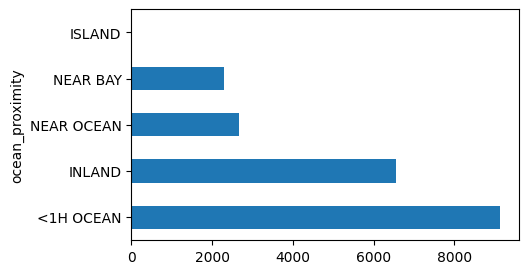

In [7]:
housing["ocean_proximity"].value_counts().plot(kind="barh",figsize=(5,3))

---
**As we can see that ,majority of the hosues are near ocean and it plays a significant role wrt to the price of the house**

---

<Axes: xlabel='median_house_value', ylabel='Count'>

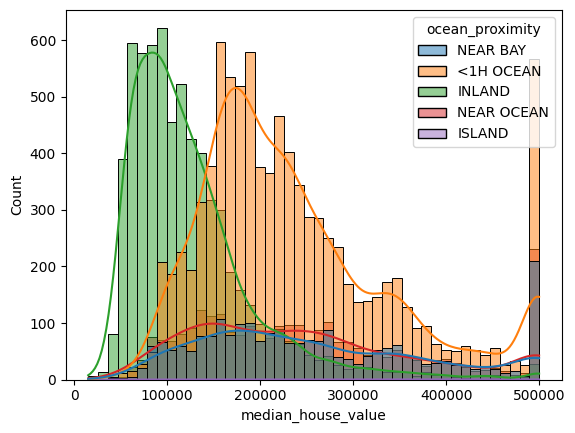

In [8]:
sns.histplot(data=housing,x="median_house_value",hue="ocean_proximity",palette="tab10",kde=True)

---
- 1.INLAND has the highest frequency in the lower price range (below 200,000), dominating the distribution.In land houses have  the median price of $10k
- 2.1hr Ocean house have the median price of 20k but with outliers and has the widest spread in the distribuition
- 3.NEAR BAY and NEAR OCEAN categories have lower frequencies and more limited ranges but still show some spread
- 4.ISLAND has very few observations, likely causing a thinner, barely noticeable distribution line.(less data wrt island houses)

---


<Axes: ylabel='median_house_value'>

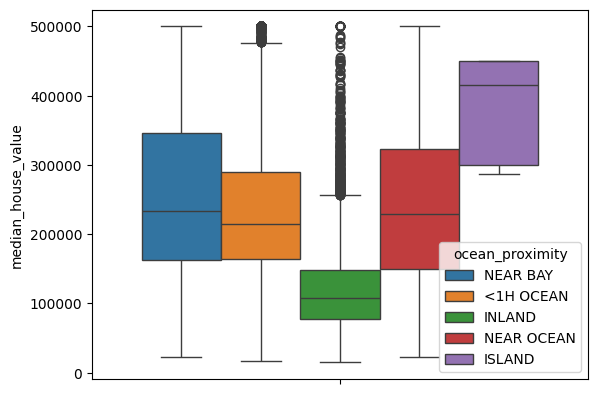

In [9]:
sns.boxplot(data=housing,y="median_house_value",hue="ocean_proximity",)

The boxplot visualizes the distribution of `median_house_value` for different categories of `ocean_proximity`. Key observations include:

- **Near Bay** and **Near Ocean** categories have relatively high median house values, with both distributions showing a wider range.
- **<1H Ocean** has a slightly lower median value and a more compressed interquartile range compared to coastal categories.
- **Inland** exhibits the lowest median and is highly concentrated below $150,000, with several outliers.
- **Island** has high values but a limited range, indicating consistency in house prices.









array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

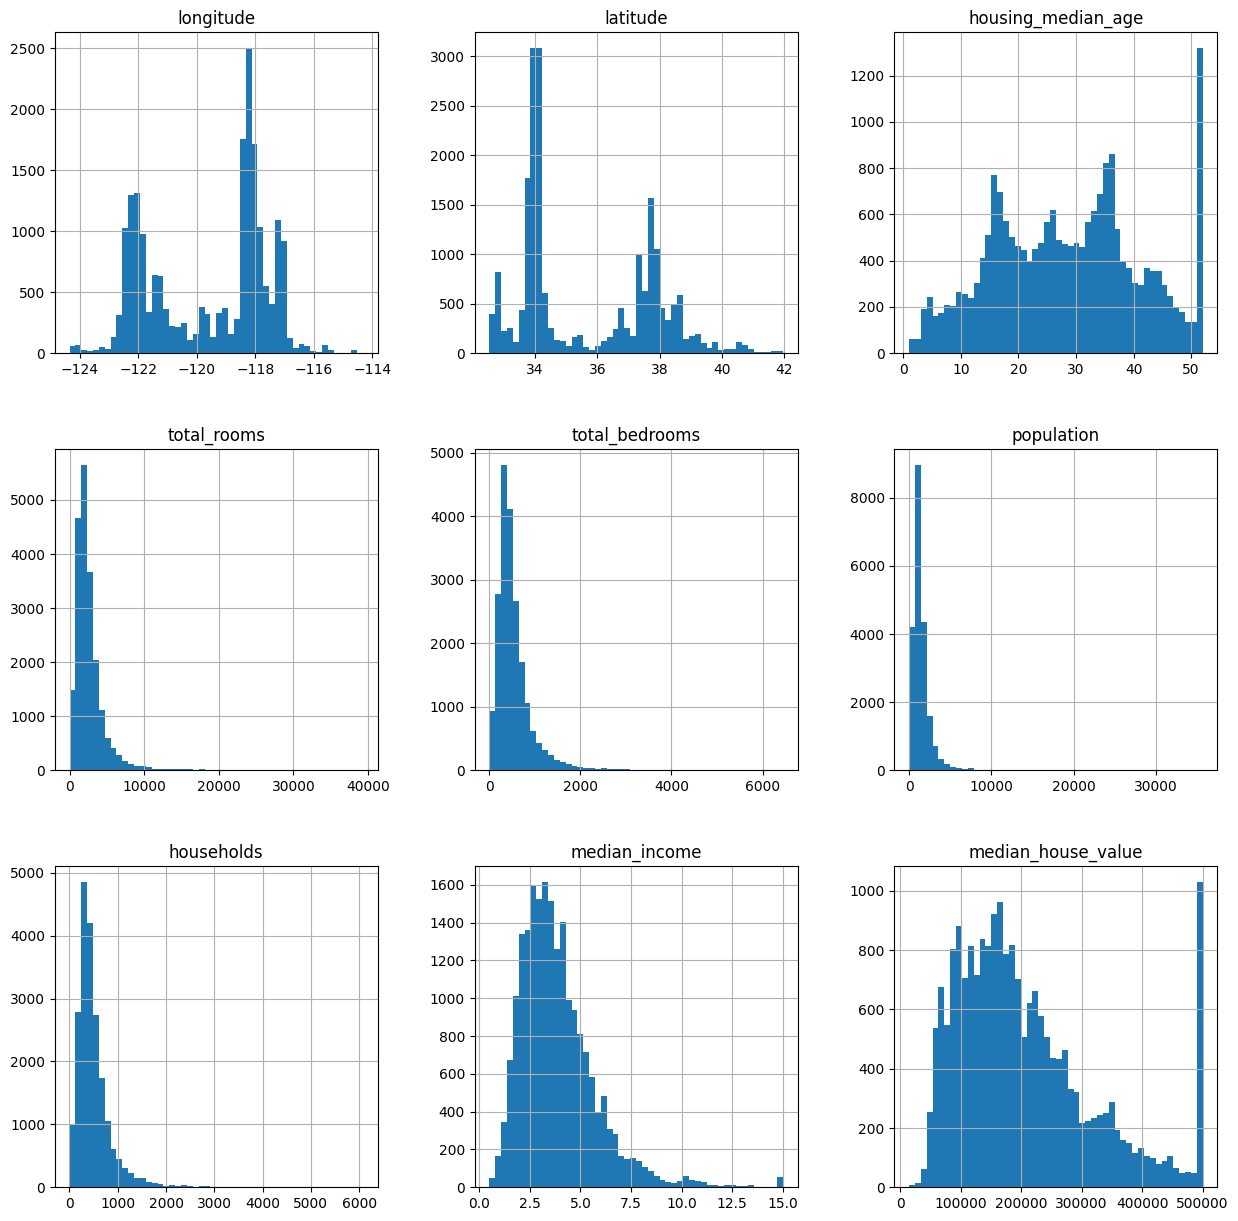

In [10]:
housing.hist(bins=50,figsize=(15,15))

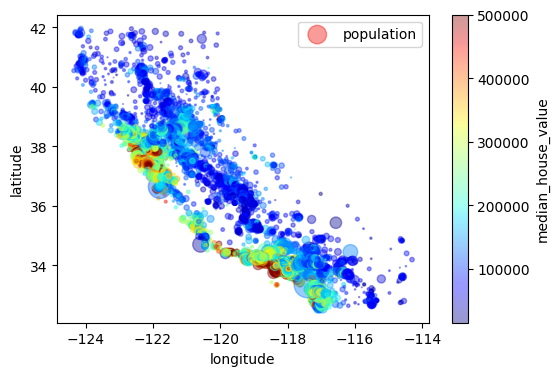

In [11]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,s=housing["population"]/100, label="population",
             figsize=(6,4),c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True)

plt.legend()


---
**The above picture shows that the `bay areas`  and some other areas of california very popular**

---

<br><h5 style="color:#FF1493;">Corelation<h5>

Since the dataset is not too large, you can easily compute the standard correlation
coeficient (also called **`Pearson’s r~**) between every pair of attributes using the corr()
method:

In [12]:
housing1=housing.copy()

In [13]:
housing1.drop(columns=["ocean_proximity"],axis=1,inplace=True)

In [14]:
corr_matrix = housing1.corr()


In [15]:
# Check the house value corelation with rest of the features
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

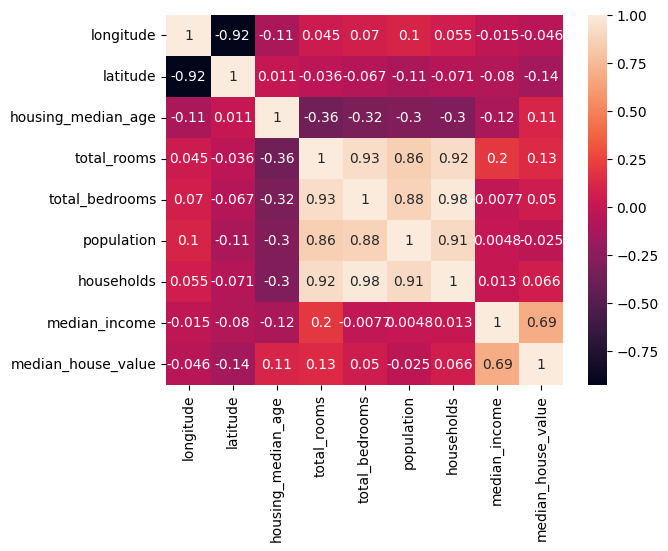

In [16]:
sns.heatmap(corr_matrix, annot=True)
plt.show()

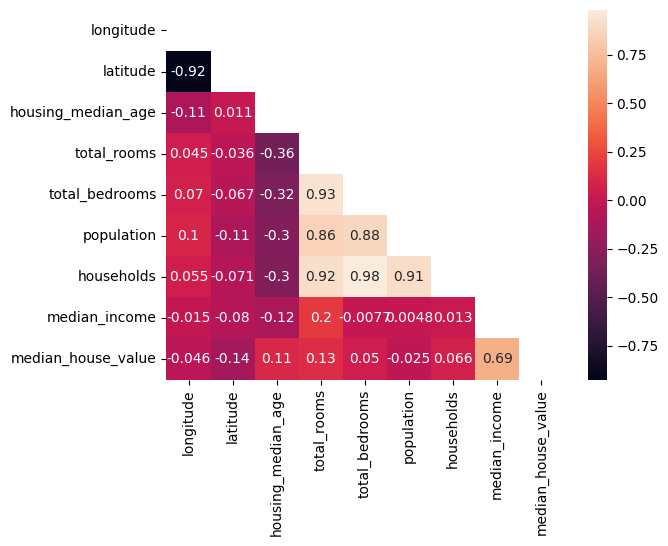

In [17]:
# How to mask the upper half of  the matrix
# set it to Nan(not a number)
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

sns.heatmap(corr_matrix, annot=True, mask=mask)
plt.show()

---
**we can see that house price is highly corelated with median income and we can confirm the same in pairplot or scatter plot below**

---

<Axes: xlabel='median_income', ylabel='median_house_value'>

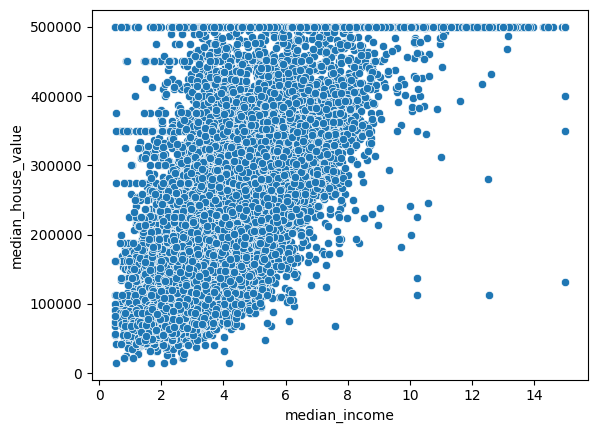

In [18]:
sns.scatterplot(data=housing,x="median_income",y="median_house_value")

## 4.Preparing the data for ML Algorithms

In [19]:
housing1=housing.copy()
housing1.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [20]:
# we dont need latitude and longitude for the price evaluation so we drop those
housing1.drop(["longitude","latitude"],axis=1,inplace=True)
housing1.head()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [21]:
housing1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   housing_median_age  20640 non-null  float64
 1   total_rooms         20640 non-null  float64
 2   total_bedrooms      20433 non-null  float64
 3   population          20640 non-null  float64
 4   households          20640 non-null  float64
 5   median_income       20640 non-null  float64
 6   median_house_value  20640 non-null  float64
 7   ocean_proximity     20640 non-null  object 
dtypes: float64(7), object(1)
memory usage: 1.3+ MB


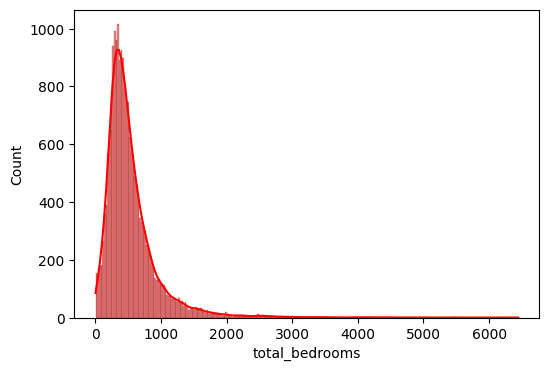

In [22]:
# we need to handle the missing values in bed rooms
plt.figure(figsize=(6,4))
sns.histplot(data=housing, x="total_bedrooms", kde=True,color="red")  # Plot histogram without KDE
plt.show()

The data is right skewed and has outliers

In [23]:
# Lets build a regression model based on the total rooms to predict the bed rooms
housing_doors=housing[~housing["total_bedrooms"].isna()]

# housing_doors.info()


X=housing_doors["total_rooms"].values
y=housing_doors["total_bedrooms"].values
# type(y)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=42)

# X_train.shape,X_test.shape,y_train.shape,y_test.shape

X_train=np.array(X_train).reshape(-1,1)
X_test=np.array(X_test).reshape(-1,1)
# X_train.shape,X_test.shape,y_train.shape

from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(X_train,y_train)
pred=reg.predict(X_test)
reg.score(X_test, y_test)


0.8741796879218474

In [24]:
#  Identify rows with NaN values in 'total_bedrooms'
nan_mask = housing1["total_bedrooms"].isna()

# Predict the missing values using the model
# Get the 'total_rooms' values for the rows with NaN in 'total_bedrooms'
X_nan = housing1.loc[nan_mask, "total_rooms"].values.reshape(-1, 1)

# Predict the missing 'total_bedrooms' values
predicted_bedrooms = reg.predict(X_nan)

# Fill the NaN values in 'total_bedrooms' with the predicted values
housing1.loc[nan_mask, "total_bedrooms"] = predicted_bedrooms


In [25]:
housing1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   housing_median_age  20640 non-null  float64
 1   total_rooms         20640 non-null  float64
 2   total_bedrooms      20640 non-null  float64
 3   population          20640 non-null  float64
 4   households          20640 non-null  float64
 5   median_income       20640 non-null  float64
 6   median_house_value  20640 non-null  float64
 7   ocean_proximity     20640 non-null  object 
dtypes: float64(7), object(1)
memory usage: 1.3+ MB


<Axes: ylabel='total_bedrooms'>

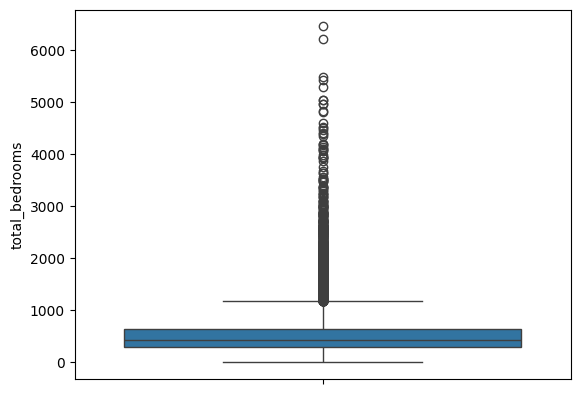

In [26]:
sns.boxplot(data=housing1,y="total_bedrooms")

**There are outliers in bedrooms .For now lets ignore these**

In [27]:
housing1.head()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [28]:
# Conver the Ocean proximity cateogorical values to numerical data
housing2=pd.get_dummies(data=housing1,columns=["ocean_proximity"],dtype=int)
housing2

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,0,1,0
1,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,0,1,0
2,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0
3,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,0,1,0
4,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
20635,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,0,1,0,0,0
20636,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,0,1,0,0,0
20637,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,0,1,0,0,0
20638,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,0,1,0,0,0


In [29]:
# Dependanat and idependant variables
y=housing2["median_house_value"]
housing2.drop(["median_house_value"],axis=1,inplace=True)
X=housing2.iloc[:,:]

In [30]:
housing2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   housing_median_age          20640 non-null  float64
 1   total_rooms                 20640 non-null  float64
 2   total_bedrooms              20640 non-null  float64
 3   population                  20640 non-null  float64
 4   households                  20640 non-null  float64
 5   median_income               20640 non-null  float64
 6   ocean_proximity_<1H OCEAN   20640 non-null  int32  
 7   ocean_proximity_INLAND      20640 non-null  int32  
 8   ocean_proximity_ISLAND      20640 non-null  int32  
 9   ocean_proximity_NEAR BAY    20640 non-null  int32  
 10  ocean_proximity_NEAR OCEAN  20640 non-null  int32  
dtypes: float64(6), int32(5)
memory usage: 1.3 MB


In [122]:
dummy_columns = housing2.columns
dummy_columns

Index(['housing_median_age', 'total_rooms', 'total_bedrooms', 'population',
       'households', 'median_income', 'ocean_proximity_<1H OCEAN',
       'ocean_proximity_INLAND', 'ocean_proximity_ISLAND',
       'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN'],
      dtype='object')

In [31]:
# Split the data into traing and testing set
X_train, X_test, y_train, y_test =train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((16512, 11), (4128, 11), (16512,), (4128,))

In [32]:
X_train

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
14196,33.0,3126.0,627.0,2300.0,623.0,3.2596,0,0,0,0,1
8267,49.0,3382.0,787.0,1314.0,756.0,3.8125,0,0,0,0,1
17445,4.0,1897.0,331.0,915.0,336.0,4.1563,0,0,0,0,1
14265,36.0,1421.0,367.0,1418.0,355.0,1.9425,0,0,0,0,1
2271,43.0,2382.0,431.0,874.0,380.0,3.5542,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
11284,35.0,1330.0,201.0,658.0,217.0,6.3700,1,0,0,0,0
11964,33.0,3084.0,570.0,1753.0,449.0,3.0500,0,1,0,0,0
5390,36.0,2101.0,569.0,1756.0,527.0,2.9344,1,0,0,0,0
860,15.0,3575.0,597.0,1777.0,559.0,5.7192,1,0,0,0,0


In [33]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train = sc.fit_transform(X_train)  # Fit and transform on X_train
X_test = sc.transform(X_test)  # Only transform on X_test

In [34]:
X_train

array([[ 0.34849025,  0.22256942,  0.21122752, ..., -0.01556621,
        -0.35564565,  2.62975816],
       [ 1.61811813,  0.34029326,  0.59309419, ..., -0.01556621,
        -0.35564565,  2.62975816],
       [-1.95271028, -0.34259695, -0.49522582, ..., -0.01556621,
        -0.35564565,  2.62975816],
       ...,
       [ 0.58654547, -0.24878577,  0.07280085, ..., -0.01556621,
        -0.35564565, -0.3802631 ],
       [-1.07984112,  0.42904599,  0.13962752, ..., -0.01556621,
        -0.35564565, -0.3802631 ],
       [ 1.85617335,  0.72841402,  1.85325421, ..., -0.01556621,
         2.81178749, -0.3802631 ]])

In [35]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((16512, 11), (4128, 11), (16512,), (4128,))

## 5.Using ensemble method

In [36]:
# we will use ensemble learning and  voting classifier
from sklearn.ensemble import RandomForestRegressor,VotingRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression

In [92]:
linear_reg=LinearRegression()
svm_reg=SVR()
Random_reg=RandomForestRegressor()

voting_reg=VotingRegressor(estimators=[("lr",linear_reg),("rf",Random_reg)])
voting_reg.fit(X_train,y_train)
voting_reg.score(X_test,y_test)

0.6920617968854659

In [93]:
from sklearn.metrics import mean_absolute_error
models=[linear_reg,svm_reg,Random_reg,voting_reg]
for model in models:
    model.fit(X_train,y_train)
    pred=model.predict(X_test)
    print("model used:",model)
    print("mean absolute error",mean_absolute_error(y_test,pred))
    print("score:",model.score(X_test,y_test))
    print("****************")

model used: LinearRegression()
mean absolute error 50976.29762926975
score: 0.620072019354794
****************
model used: SVR()
mean absolute error 86797.11013436009
score: -0.04000339703742872
****************
model used: RandomForestRegressor()
mean absolute error 43122.168069282954
score: 0.7044790070607869
****************
model used: VotingRegressor(estimators=[('lr', LinearRegression()),
                            ('rf', RandomForestRegressor())])
mean absolute error 45088.2674741469
score: 0.6916661767671665
****************


---
**We can see that random forest has good score and low mae even after uisng voting classifier**

---

## 6.Using Neural Networks

In [74]:
#3 using Ann
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Input,Dropout
from tensorflow.keras.regularizers import L2


In [82]:
Ann_model=Sequential()
Ann_model.add(Input(shape=(X_train.shape[1],)))

Ann_model.add(Dense(units=128,activation="relu",kernel_regularizer=L2(0.001)))
Ann_model.add(Dropout(rate=0.3))
Ann_model.add(Dense(units=64,activation="relu",kernel_regularizer=L2(0.001)))
Ann_model.add(Dropout(rate=0.3))

Ann_model.add(Dense(units=32,activation="relu",kernel_regularizer=L2(0.001)))
Ann_model.add(Dropout(rate=0.3))

Ann_model.add(Dense(units=1))


In [83]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
Ann_model.compile(optimizer=Adam(learning_rate=0.0001),metrics=['mae'],loss="mae")

In [84]:
early_stop=EarlyStopping(patience=10,restore_best_weights=True)

In [85]:
hist=Ann_model.fit(x=X_train,y=y_train,epochs=300,callbacks=[early_stop],validation_data=(X_test,y_test))

Epoch 1/300
516/516 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 207033.7188 - mae: 207033.6250 - val_loss: 205440.1719 - val_mae: 205440.0000
Epoch 2/300
516/516 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 207175.9844 - mae: 207175.7812 - val_loss: 204780.7500 - val_mae: 204780.3438
Epoch 3/300
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 206232.6875 - mae: 206232.2344 - val_loss: 202421.0781 - val_mae: 202420.3750
Epoch 4/300
516/516 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 202340.8594 - mae: 202340.0156 - val_loss: 197115.6719 - val_mae: 197114.4375
Epoch 5/300
516/516 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 197441.8125 - mae: 197440.4375 - val_loss: 187634.5938 - val_mae: 187632.7812
Epoch 6/300
516/516 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 186742.0312 - mae: 186740.0469 - val_loss: 172972.4531 - val_mae: 172969.9688
Epoch 7/300
516/516 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 169767.1094 - mae: 169764.3906 - val_loss: 154016.8906 - val_mae: 154013.6875
Epoch 8/300
516/516 ━━━━━━━

In [86]:
hist.history.keys()

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])

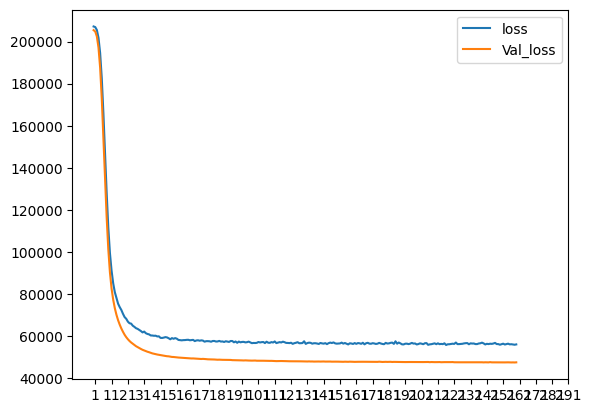

In [88]:
plt.plot(hist.history["loss"],label="loss")
plt.plot(hist.history["val_loss"],label="Val_loss")
plt.legend()
plt.xticks(np.arange(1,300,10));

In [91]:
# Evaluate the model on the test data
results = Ann_model.evaluate(X_test, y_test, verbose=0)  # verbose=0 suppresses output

# If you only have a single metric in addition to loss, you can unpack like this:
loss, metric = results

print(f"Test Loss: {loss}")
print(f"Test Metric : {metric}")


Test Loss: 47436.46484375
Test Metric : 47429.30859375


## 7.Choosing the right model

**Since we got less mae and high r^2 score in Random Forest, we will choose it for futher predictions**

### Using Grid search 

In [95]:
from sklearn.ensemble import RandomForestRegressor
rf_reg=RandomForestRegressor()

grid_search={
    "n_estimators":[100,120,140,160,180,200],
    "max_depth":[2,4,6,8,10,12,14]
}



In [97]:
from sklearn.model_selection import GridSearchCV
grid=GridSearchCV(estimator=rf_reg,param_grid=grid_search,cv=5, scoring='neg_mean_absolute_error', n_jobs=-1)
# Fit the grid search to the data
grid.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [2, 4, 6, 8, 10, 12, 14],
                         'n_estimators': [100, 120, 140, 160, 180, 200]},
             scoring='neg_mean_absolute_error')

In [100]:
# Output the best parameters and best score
print("Best Parameters:", grid.best_params_)
print("Best Mean Absolute Error:", grid.best_score_)

Best Parameters: {'max_depth': 14, 'n_estimators': 180}
Best Mean Absolute Error: -43142.98746174601


In [101]:
# Retrieve the best model from the grid search
best_rf_model = grid.best_estimator_

# Print the best model parameters
print("Best Model Parameters:", best_rf_model.get_params())


Best Model Parameters: {'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': 14, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 180, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [102]:
best_rf_model.score(X_test,y_test)

0.7051938593991862

---
**So our bed model has a r^2 score of 70 and mae of 43142**

---

## 8.Predict the prices 

In [105]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [140]:
# Enter the input data
z=[[-122.23,36,40,870,125,300,125,8.4,"NEAR BAY"]]

### Creating the function to ocnvert the given input into the format that the model needs

In [152]:
cols=housing .drop(["median_house_value"],axis=1).columns
# cols
def predict_the_house_price(house_parameters):
    df=pd.DataFrame(data=house_parameters,columns=cols)                                          # Converting  dataframe from the given data
    df=df.iloc[:,2:]                                                                             # slecting the required columns
    new_data_encoded = pd.get_dummies(df, columns=["ocean_proximity"],dtype=int)                 # Creating the dummy

    # Reindex the new data to match the columns of housing2 (fill missing columns with 0)         # Reindexing the dummy varaible
    new_data_encoded = new_data_encoded.reindex(columns=dummy_columns, fill_value=0)            
    new_data_encoded=sc.transform(new_data_encoded.values)                                        # standardizing the values
    
    # Display the encoded new data
    # return new_data_encoded
    return (best_rf_model.predict(new_data_encoded))   
    


# Predicting the price
price=predict_the_house_price(z)
price[0]

470915.9498886815